## Лабораторная работа 6
## Решение интегральных уравнений Вольтерры
Выполнил: Гапанович А. В. (4 группа)\
Вариант : 1

Для решения дано следующее уравнение:
$$x(t) = \int_{0}^{t}{(t-s)x(s)ds}+2sinh(t), t\in \left[0;5 \right], \tau = 0.5$$





Цель: решить данное уравнение
* методом сведения его к ОДУ (с последующим решением полученного ОДУ аналитически или численно)
* указанным квадратурным правилом с заданным шагом сетки τ.

# Аналитическое решение
Решение самого интегрального уравнения в Wolfram Mathematica:
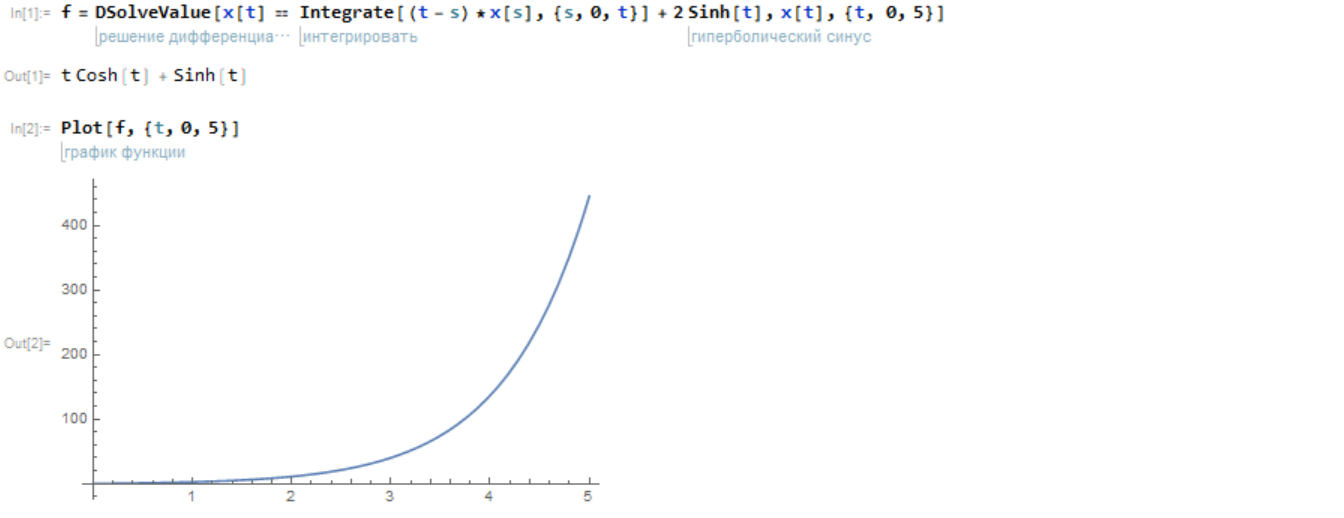

Сведём интегральное уравнение к ОДУ, получим:
$$x'(t) = 2ch(t) +\int_{0}^{t}{x(s)ds} \\
x''(t) = 2sh(t)+x(t) \\
x(0) = \int_{0}^{0}{-sx(s)ds}+2sh(t) = 0 \\
x'(0) = 2ch2 +\int_{0}^{0}{x(s)ds}$$
Решим ОДУ средствами Wolfram Mathematica:
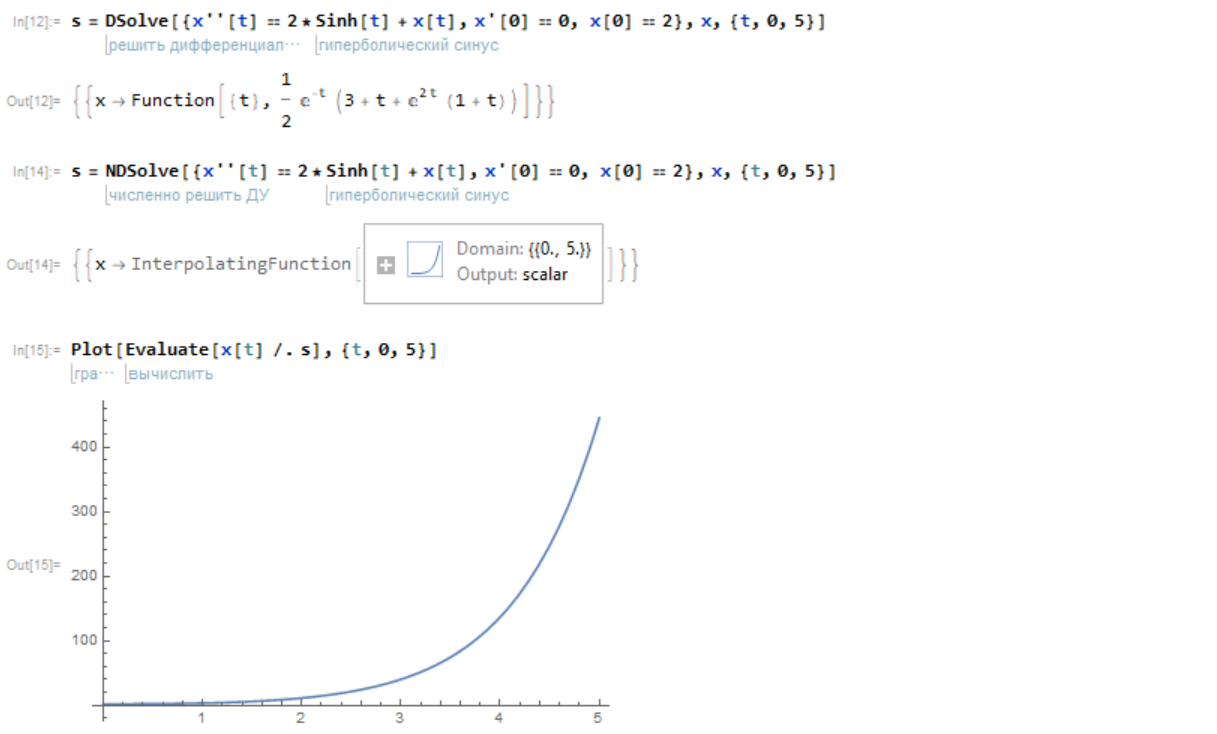

In [53]:
import matplotlib.pyplot as plt
from typing import Callable
import numpy as np
import math

In [140]:
tau = 0.5
min = 0
max = 5

def k(t, s):
    return (t-s)

def f(t):
    return 2*math.sinh(t)

def fun_analytical():
    n_t = 60
    tau = int((max-min)/n_t)
    t = np.linspace(min, max, n_t)
    u = np.zeros((n_t, 1))
    for i in range(n_t):
        u[i] = t[i]*math.cosh(t[i])+math.sinh(t[i])
    return u, t


In [171]:
def Simpson_method(min, max, tau):
    t = np.arange(min, max + tau, tau)
    n = len(t)
    y = list(f(i) for i in t)
    solve = y
    for i in range(n):
        solve[i] = 0
        for j in range(2,i,2):
            solve[i]=solve[i] + (4*k(t[i], t[j])) * y[j]
        for j in range (1,i, 2):
            solve[i] =solve[i]+(2*k(t[i],t[j]))*y[j]
        solve[i] = solve[i] + k(t[i], t[1])*y[1] + k(t[i], t[i])*y[i]
        solve[i] = f(t[i]) + solve[i] * tau / 3
    solve = np.array(solve)
    return solve, t

In [172]:
def draw_Simpson_method():
    x_0, t_0 = fun_analytical()
    x_1, t_1 = Simpson_method(min, max, tau)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(2, 2)
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    plt.title('Решение методом трапеций')
    plt.grid(True)
    plt.plot(t_1, x_1)
    plt.plot(t_0, x_0)
    fig_ax_2.legend( ('Численное', 'Аналитическое'))

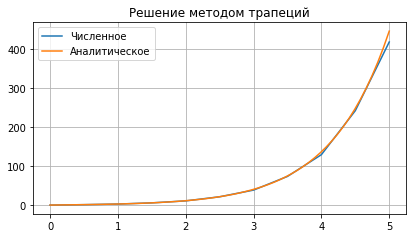

In [173]:
draw_Simpson_method()